# Tokenization

In [ ]:
!pip install nltk spacy

In [1]:
import nltk as nt
import spacy as sp

In [2]:
nt.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
text='''Elon Reeve Musk (/ˈiːlɒn/; born June 28, 1971) is a businessman known for his key roles in the space company SpaceX and the automotive company Tesla, Inc. Other involvements include ownership of X Corp., the company that operates the social media platform X (formerly Twitter), and his role in the founding of the Boring Company, xAI, Neuralink, and OpenAI. In November 2024, President-elect Donald Trump announced Musk is set to become co-chair of the proposed Department of Government Efficiency (DOGE) in the second Trump administration. Musk is the wealthiest individual in the world; as of November 2024 Forbes estimates his net worth to be US$304 billion.[3]

Musk was born in Pretoria, South Africa, and briefly attended the University of Pretoria before immigrating to Canada at the age of 18, acquiring citizenship through his Canadian-born mother. Two years later, he matriculated at Queen's University at Kingston in Canada. Musk later transferred to the University of Pennsylvania and received bachelor's degrees in economics and physics. He moved to California in 1995 to attend Stanford University but never enrolled in classes, and with his brother Kimbal co-founded the online city guide software company Zip2. The startup was acquired by Compaq for $307 million in 1999. That same year, Musk co-founded X.com, a direct bank. X.com merged with Confinity in 2000 to form PayPal. In 2002, Musk acquired US citizenship, and that October eBay acquired PayPal for $1.5 billion. Using $100 million of the money he made from the sale of PayPal, Musk founded SpaceX, a spaceflight services company, in 2002.

In 2004, Musk was an early investor in electric-vehicle manufacturer Tesla Motors, Inc. (later Tesla, Inc.), providing most of the initial financing and assuming the position of the company's chairman. He later became the product architect and, in 2008, the CEO. In 2006, Musk helped create SolarCity, a solar energy company that was acquired by Tesla in 2016 and became Tesla Energy. In 2013, he proposed a hyperloop high-speed vactrain transportation system. In 2015, he co-founded OpenAI, a nonprofit artificial intelligence research company. The following year Musk co-founded Neuralink, a neurotechnology company developing brain–computer interfaces, and The Boring Company, a tunnel construction company. In 2018 the U.S. Securities and Exchange Commission (SEC) sued Musk, alleging that he had falsely announced that he had secured funding for a private takeover of Tesla. To settle the case Musk stepped down as the chairman of Tesla and paid a $20 million fine. In 2022, he acquired Twitter for $44 billion, merged the company into the newly-created X Corp. and rebranded the service as X the following year. In March 2023, Musk founded xAI, an artificial-intelligence company.'''

In [6]:
from nltk.tokenize import sent_tokenize

In [8]:
nt.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
sentences=nt.sent_tokenize(text)

In [12]:
len(sentences)

22

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
words=word_tokenize(text)

In [16]:
list(words)

['Elon',
 'Reeve',
 'Musk',
 '(',
 '/ˈiːlɒn/',
 ';',
 'born',
 'June',
 '28',
 ',',
 '1971',
 ')',
 'is',
 'a',
 'businessman',
 'known',
 'for',
 'his',
 'key',
 'roles',
 'in',
 'the',
 'space',
 'company',
 'SpaceX',
 'and',
 'the',
 'automotive',
 'company',
 'Tesla',
 ',',
 'Inc.',
 'Other',
 'involvements',
 'include',
 'ownership',
 'of',
 'X',
 'Corp.',
 ',',
 'the',
 'company',
 'that',
 'operates',
 'the',
 'social',
 'media',
 'platform',
 'X',
 '(',
 'formerly',
 'Twitter',
 ')',
 ',',
 'and',
 'his',
 'role',
 'in',
 'the',
 'founding',
 'of',
 'the',
 'Boring',
 'Company',
 ',',
 'xAI',
 ',',
 'Neuralink',
 ',',
 'and',
 'OpenAI',
 '.',
 'In',
 'November',
 '2024',
 ',',
 'President-elect',
 'Donald',
 'Trump',
 'announced',
 'Musk',
 'is',
 'set',
 'to',
 'become',
 'co-chair',
 'of',
 'the',
 'proposed',
 'Department',
 'of',
 'Government',
 'Efficiency',
 '(',
 'DOGE',
 ')',
 'in',
 'the',
 'second',
 'Trump',
 'administration',
 '.',
 'Musk',
 'is',
 'the',
 'wealthie

In [17]:
len(words)

526

In [18]:
from nltk.tokenize import wordpunct_tokenize

In [19]:
words=wordpunct_tokenize(text)

In [20]:
len(words)

562

In [21]:
from nltk.tokenize import TreebankWordTokenizer

In [23]:
tree=TreebankWordTokenizer()

In [25]:
words=tree.tokenize(text)

In [26]:
len(words)

505

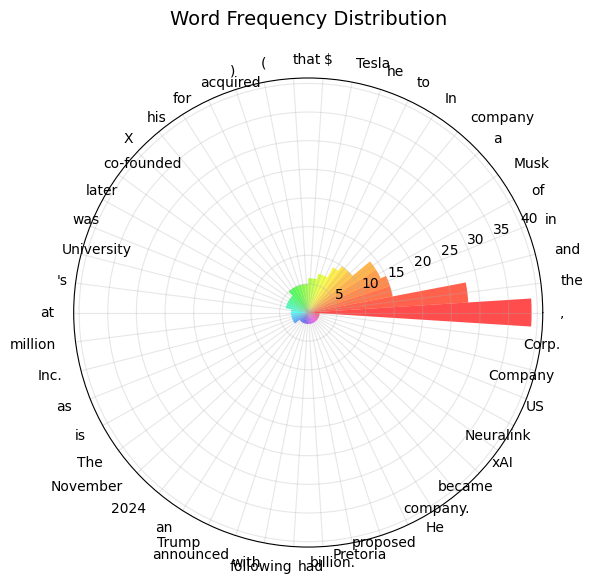

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

def create_word_frequency_df(words, top_n=50):
    # Create frequency distribution
    word_freq = Counter(words)

    # Convert to dataframe and sort by frequency
    df = pd.DataFrame(list(word_freq.items()), columns=['word', 'frequency'])
    df = df.sort_values('frequency', ascending=False)

    # Take top N words
    return df.head(top_n)

def create_radial_word_frequency(df):
    # Number of words
    N = len(df)

    # Compute the angle for each word
    angles = np.linspace(0, 2*np.pi, N, endpoint=False)

    # Set up the figure with a polar projection
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='polar')

    # Plot the bars
    bars = ax.bar(
        angles,
        df['frequency'],
        width=2*np.pi/N,
        alpha=0.7,
    )

    # Color the bars using a color cycle
    cm = plt.cm.hsv
    for i, bar in enumerate(bars):
        bar.set_facecolor(cm(i/N))

    # Rotate the labels
    ax.set_xticks(angles)
    ax.set_xticklabels(df['word'], rotation=0)

    # Adjust label alignment and rotation
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

        # Rotate labels for better readability
        if angle <= np.pi/2 or angle > 3*np.pi/2:
            label.set_rotation(angle * 180/np.pi - 90)
        else:
            label.set_rotation(angle * 180/np.pi + 90)

    # Add gridlines and adjust their appearance
    ax.grid(True, alpha=0.3)

    # Set title
    plt.title('Word Frequency Distribution', pad=20, size=14)

    # Adjust layout to prevent label clipping
    plt.tight_layout()

    return fig

# Assuming you have your tokenized words in a variable called 'words'
# Use the functions like this:
word_freq_df = create_word_frequency_df(words, top_n=50)  # Adjust top_n as needed
fig = create_radial_word_frequency(word_freq_df)
plt.show()

In [29]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
#Retrieve a copy of the text from the url
text_file = urllib.request.urlopen("https://www.gutenberg.org/cache/epub/64317/pg64317.txt")

#Read and decode the text
text = text_file.read().decode('utf-8')

#Preview a section of the text
print(text[1400:2000])

r,
  I must have you!”

  Thomas Parke d’Invilliers


                                  I

In my younger and more vulnerable years my father gave me some advice
that I’ve been turning over in my mind ever since.

“Whenever you feel like criticizing anyone,” he told me, “just
remember that all the people in this world haven’t had the advantages
that you’ve had.”

He didn’t say any more, but we’ve always been unusually communicative
in a reserved way, and I understood that he meant a great deal more
than that. In consequence, I’m inclined to reserve all judgements, a
habit that


In [41]:
text='''
Elon Reeve Musk (/ˈiːlɒn/; born June 28, 1971) is a businessman known for his key roles in the space company SpaceX and the automotive company Tesla, Inc. Other involvements include ownership of X Corp., the company that operates the social media platform X (formerly Twitter), and his role in the founding of the Boring Company, xAI, Neuralink, and OpenAI. In November 2024, President-elect Donald Trump announced Musk is set to become co-chair of the proposed Department of Government Efficiency (DOGE) in the second Trump administration. Musk is the wealthiest individual in the world; as of November 2024 Forbes estimates his net worth to be US$304 billion.[3]

Musk was born in Pretoria, South Africa, and briefly attended the University of Pretoria before immigrating to Canada at the age of 18, acquiring citizenship through his Canadian-born mother. Two years later, he matriculated at Queen's University at Kingston in Canada. Musk later transferred to the University of Pennsylvania and received bachelor's degrees in economics and physics. He moved to California in 1995 to attend Stanford University but never enrolled in classes, and with his brother Kimbal co-founded the online city guide software company Zip2. The startup was acquired by Compaq for $307 million in 1999. That same year, Musk co-founded X.com, a direct bank. X.com merged with Confinity in 2000 to form PayPal. In 2002, Musk acquired US citizenship, and that October eBay acquired PayPal for $1.5 billion. Using $100 million of the money he made from the sale of PayPal, Musk founded SpaceX, a spaceflight services company, in 2002.

In 2004, Musk was an early investor in electric-vehicle manufacturer Tesla Motors, Inc. (later Tesla, Inc.), providing most of the initial financing and assuming the position of the company's chairman. He later became the product architect and, in 2008, the CEO. In 2006, Musk helped create SolarCity, a solar energy company that was acquired by Tesla in 2016 and became Tesla Energy. In 2013, he proposed a hyperloop high-speed vactrain transportation system. In 2015, he co-founded OpenAI, a nonprofit artificial intelligence research company. The following year Musk co-founded Neuralink, a neurotechnology company developing brain–computer interfaces, and The Boring Company, a tunnel construction company. In 2018 the U.S. Securities and Exchange Commission (SEC) sued Musk, alleging that he had falsely announced that he had secured funding for a private takeover of Tesla. To settle the case Musk stepped down as the chairman of Tesla and paid a $20 million fine. In 2022, he acquired Twitter for $44 billion, merged the company into the newly-created X Corp. and rebranded the service as X the following year. In March 2023, Musk founded xAI, an artificial-intelligence company.

Musk's actions and expressed views have made him a polarizing figure. He has been criticized for making unscientific and misleading statements, including COVID-19 misinformation, promoting right-wing conspiracy theories, and endorsing an antisemitic trope; he has since apologized for the latter. His ownership of Twitter has been controversial because of the layoffs of large numbers of employees, an increase in hate speech, misinformation and disinformation posts on the website, and changes to website features, including verification.

In early 2024, Musk became active in American politics as a vocal and financial supporter of Donald Trump, becoming Trump's second-largest individual donor in October 2024. In November 2024, Trump announced that he had chosen Musk along with Vivek Ramaswamy to co-lead DOGE, a new advisory board which aims to improve government efficiency through measures such as slashing "excess regulations" and cutting "wasteful expenditures".'''

In [42]:
words = word_tokenize(text)

#check the number of words
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 688


In [43]:
#find the frequency of words
fdist = FreqDist(words)

#print the 10 most common words
fdist.most_common(10)

[(',', 50),
 ('the', 31),
 ('.', 27),
 ('and', 22),
 ('of', 19),
 ('in', 18),
 ('Musk', 17),
 ('a', 13),
 ('company', 12),
 ('In', 11)]

In [44]:
#create an empty list to store words
words_no_punc = []

#iterate through the words list to remove punctuations
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

#print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 526


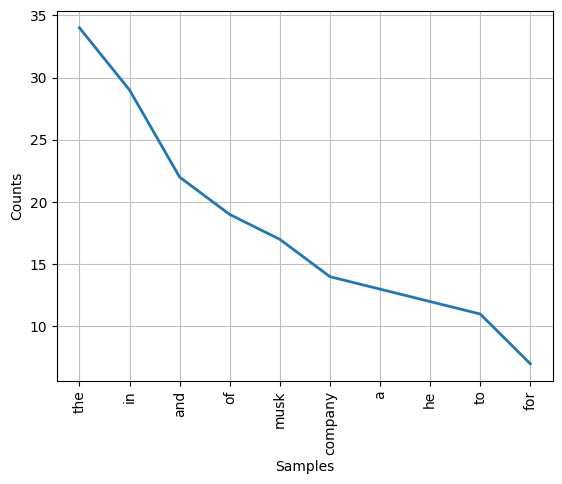

In [46]:
#find the frequency of words
fdist = FreqDist(words_no_punc)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

In [47]:
#Download and import list of stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

#list of stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 317


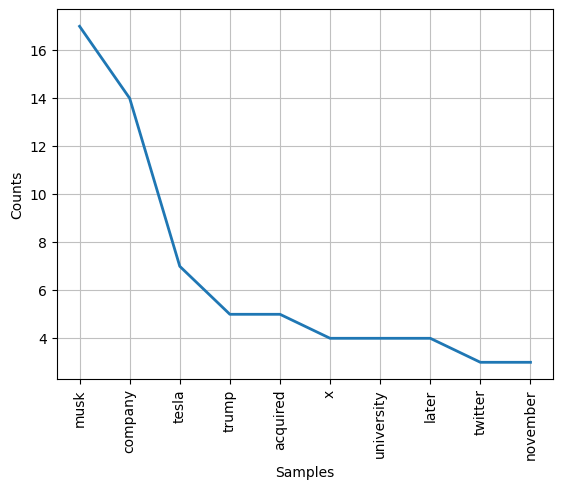

In [49]:
#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

In [50]:
#Update the stopwords list
stopwords_list.extend(["said","one","like","came","back"])

#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

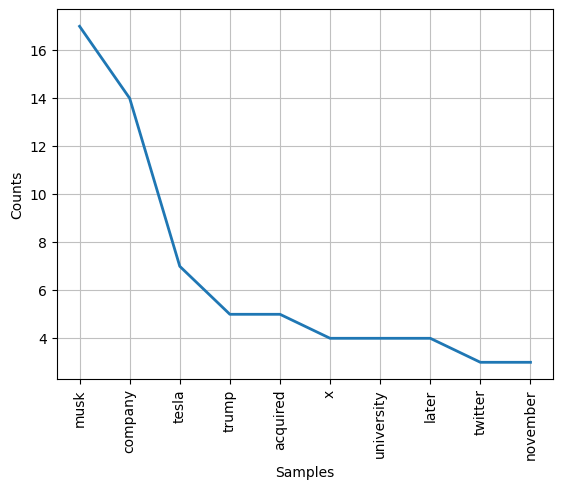

In [51]:

#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

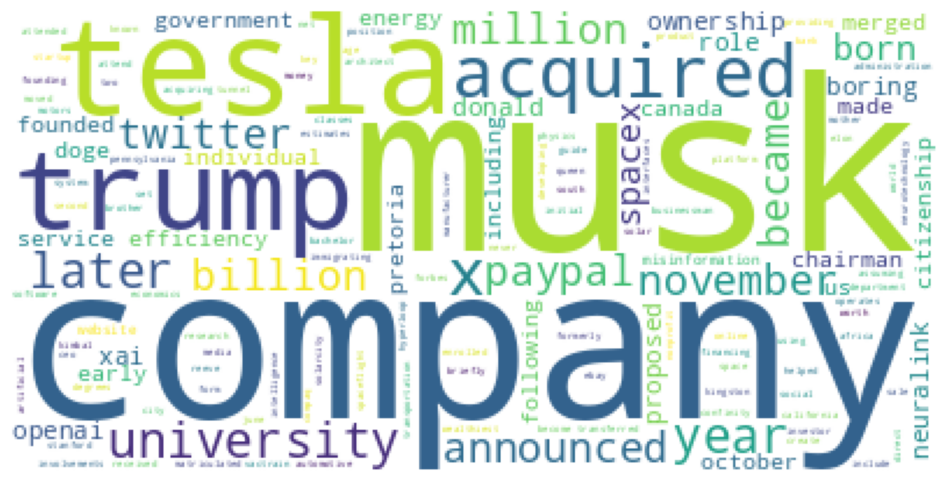

In [52]:
#Convert word list to a single string
clean_words_string = " ".join(clean_words)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()